In [20]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os

In [42]:
folder="./Tamil-English/AUDIO/"
audio_clips=os.listdir(folder)
total=len(audio_clips)
print("No. of .wav files in audio folder = ",total)

No. of .wav files in audio folder =  382


In [30]:
pict_Path="./Tamil-English/PIC"
if not os.path.exists(pict_Path):
    os.makedirs(pict_Path)

In [22]:
audio_array=[]
for i in range(0,total):
    audio_clips[i]=audio_clips[i].replace("m4a","wav")
    audio_clips[i]=audio_clips[i].replace("ogg","wav")
    x, sr = librosa.load(folder+audio_clips[i], sr=44100,duration=7) 
    audio_array.append(x)

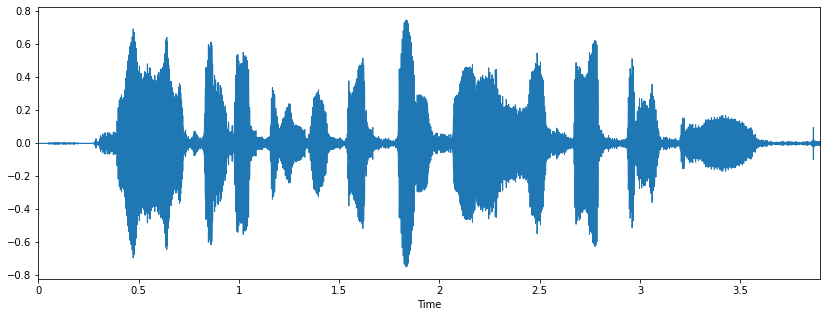

In [23]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

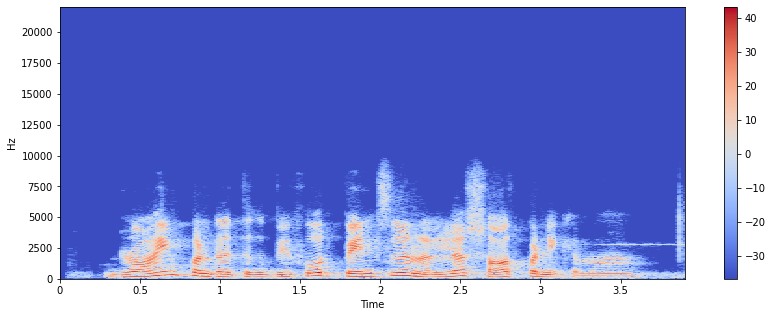

In [24]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

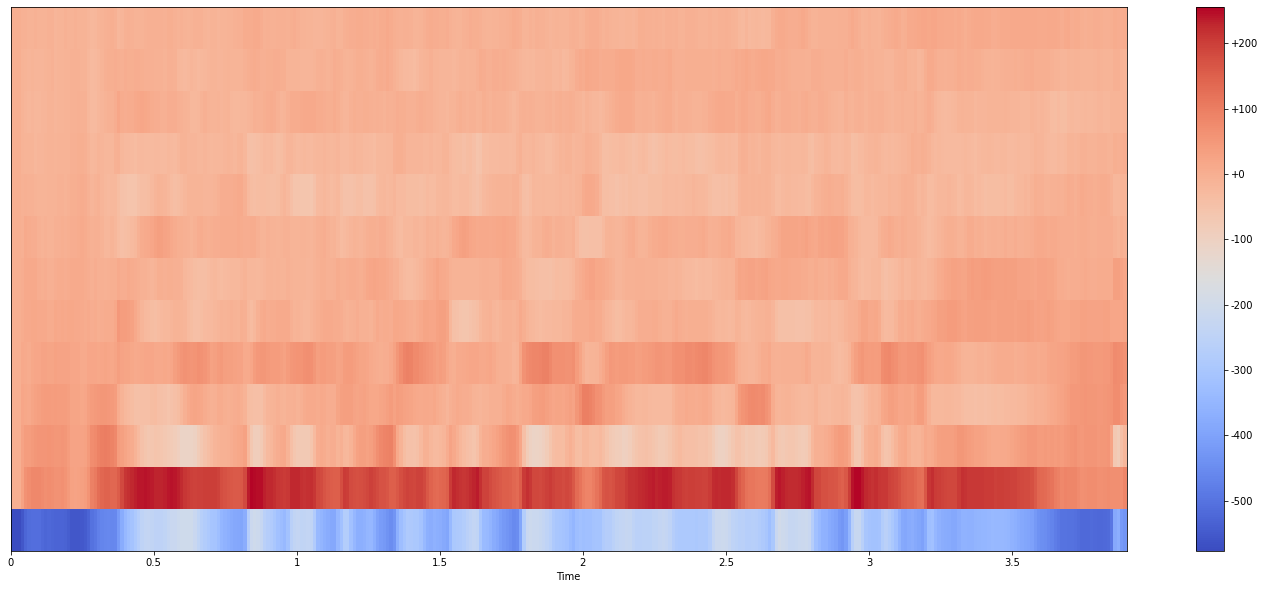

In [25]:
mfccs = librosa.feature.mfcc(y=x, n_mfcc=13, sr=sr)
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [26]:
len(audio_array)

390

In [27]:
from scipy import signal
from scipy.io import wavfile
from PIL import Image
from scipy.fftpack import fft
from scipy.io import wavfile
from sklearn.decomposition import PCA
import numpy as np

In [28]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, _, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, np.log(spec.T.astype(np.float32) + eps)

In [41]:
fig = plt.figure(figsize=(4,4))
for i in range(0,total):    
    filepath=folder+audio_clips[i]  
    # create spectogram
    samplerate, test_sound  = wavfile.read(filepath)
    _, spectrogram = log_specgram(test_sound, samplerate)
        
    output_file = filepath.split('/')[-1].split('.wav')[0]
    output_file = pict_Path +'/'+ output_file
    plt.imsave('%s.png' % output_file, spectrogram)
    plt.close()

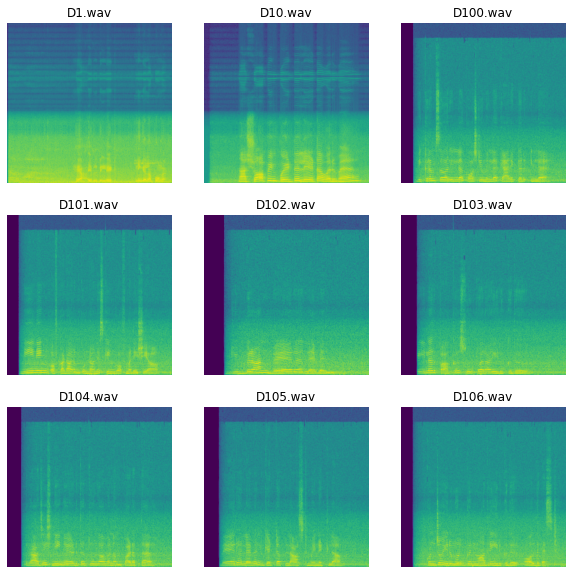

In [39]:
fig=plt.figure(figsize=(10,10))
for i in range(9):
    filepath=folder+audio_clips[i]
    # Make subplots
    plt.subplot(3,3,i+1)
    
    # pull the labels
    label = filepath.split('/')[-1]
    plt.title(label)
    
    # create spectogram
    samplerate, test_sound  = wavfile.read(filepath)
    _, spectrogram = log_specgram(test_sound, samplerate)
    
    plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    plt.axis('off')
    